Continuar desde la Parte IV

* Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.

Exploración de Datos Avanzada

* Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
* Crea subplots para comparar diferentes variables clave.
* Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

Generar un Tag en GitHub y Realizar una Presentación

* Generar un Tag en GitHub: Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub, genera un Pull Request (PR) para revisión y finalmente crea un tag para esta versión del proyecto.
* Realizar una Presentación: Prepara una presentación en slides que resuma tu análisis y visualizaciones. La presentación debe incluir:
    * Introducción y objetivos del proyecto.
    * Descripción del conjunto de datos.
    * Principales análisis y hallazgos.
    * Visualizaciones clave con explicación.
    * Conclusiones y recomendaciones.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def cargar_datos(ruta_archivo):
    # Carga los datos del archivo CSV
    datos = pd.read_csv(ruta_archivo, delimiter=',')
    return datos
##Se realiza la carga con Pandas ya que numpy no muestra los valores categoricos
if __name__ == "__main__":
    ruta_archivo = '../trabajos_core/data/retail_sales_dataset_limpio.csv'
    df = cargar_datos(ruta_archivo)  

df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


Dtype Original:  Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


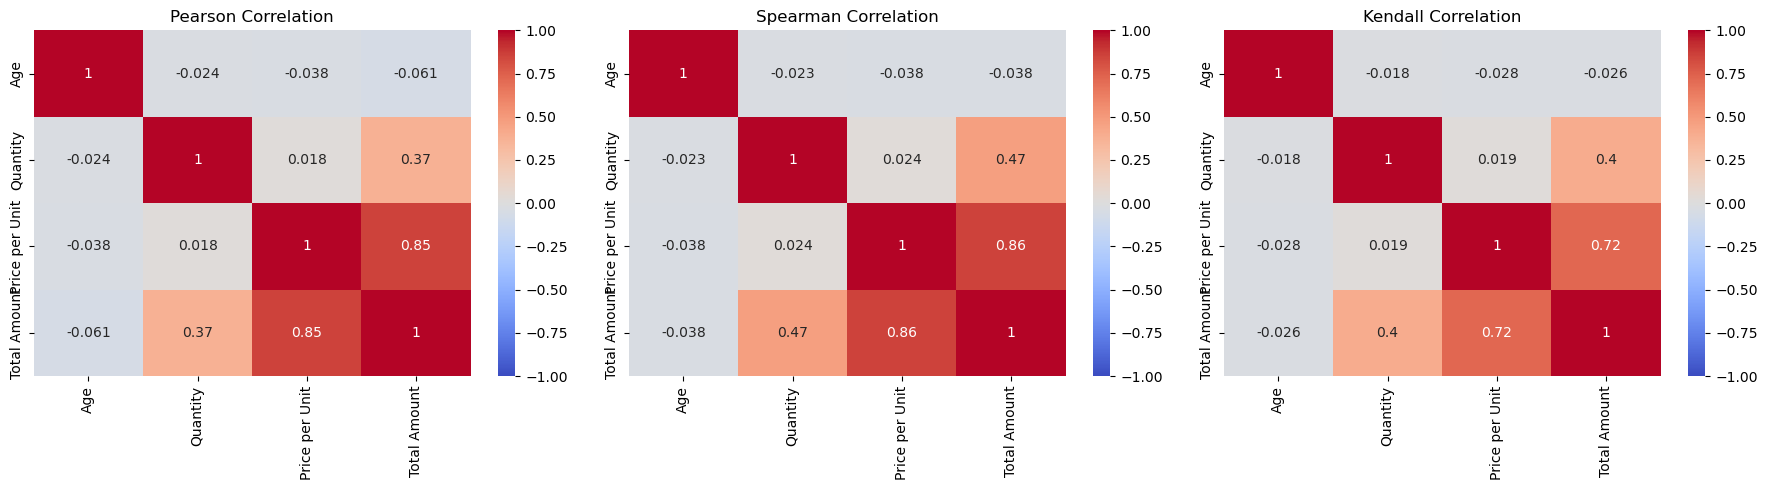

In [10]:
print("Dtype Original: ", df.dtypes)

## Se toman en consideracion las columnas numericas
features_numericos = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

def plot_grafico_outliers(features, df):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # Seleccionar solo las columnas numéricas especificadas
    df_numerico = df[features]

    # Correlación de Pearson
    correlation_matrix = df_numerico.corr(method='pearson')
    sns.heatmap(correlation_matrix, ax=axes[0], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    axes[0].set_title("Pearson Correlation")

    # Correlación de Spearman
    spearman_corr = df_numerico.corr(method='spearman')
    sns.heatmap(spearman_corr, ax=axes[1], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title("Spearman Correlation")

    # Correlación de Kendall
    kendall_corr = df_numerico.corr(method='kendall')
    sns.heatmap(kendall_corr, ax=axes[2], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    axes[2].set_title("Kendall Correlation")

    plt.tight_layout()
    plt.show()
plot_grafico_outliers(features_numericos,df)

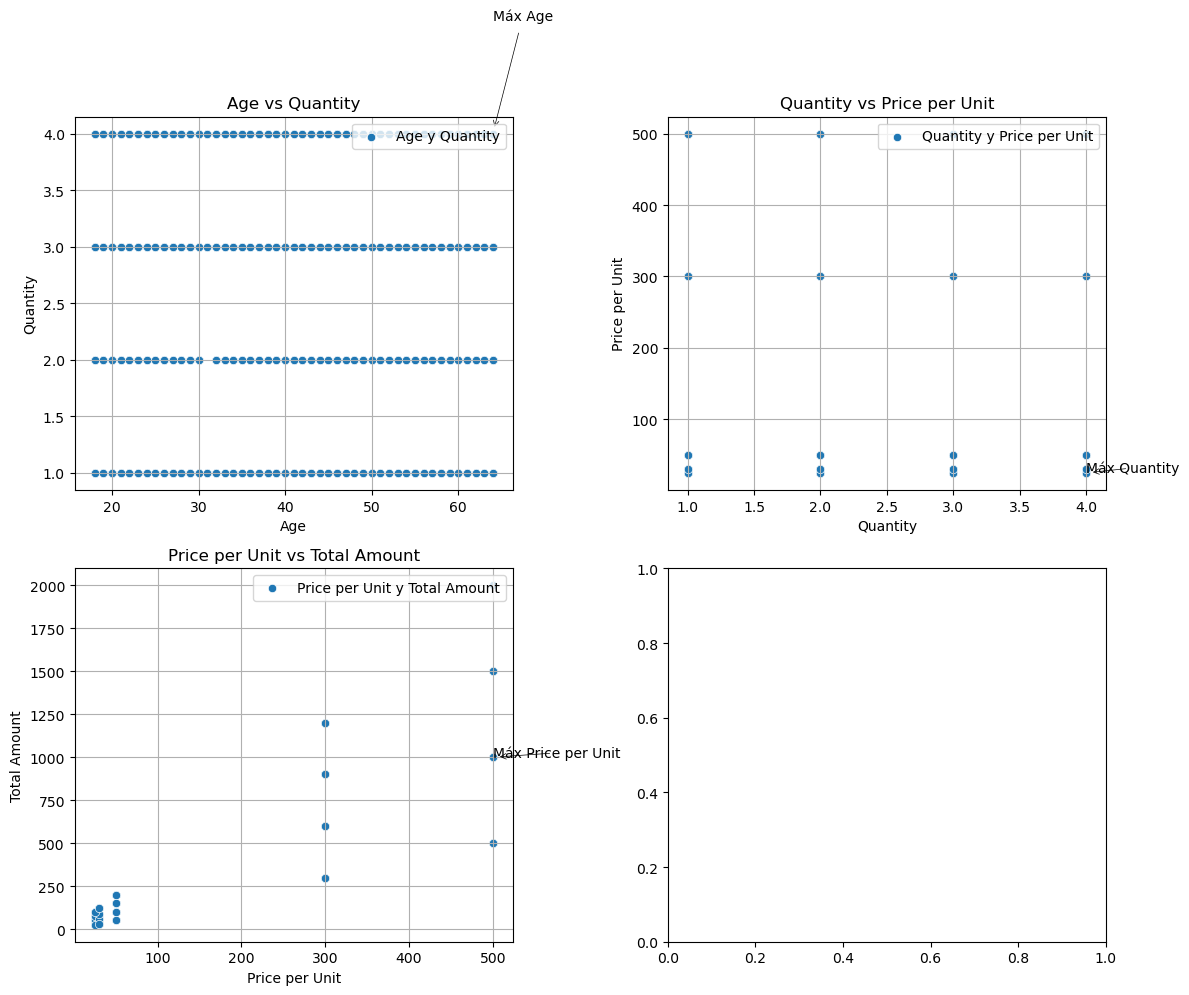

In [ ]:
##Crear subplots para comparar variables y añade cuadrículas, leyendas, anotaciones y flechas para mejorar la claridad y la información.
variables = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
def subplots_variables_clave(variables, df):
    # Crear una figura de 2x2 para comparar pares de variables clave
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    # Graficar cada par de variables clave en un subplot
    for i, (var1, var2) in enumerate(zip(variables, variables[1:])):
        row, col = divmod(i, 2)  # Determina la posición en la cuadrícula de subplots
        ax = axes[row, col]

        # Crear gráfico de dispersión
        sns.scatterplot(data=df, x=var1, y=var2, ax=ax)

        # Título de cada subplot
        ax.set_title(f'{var1} vs {var2}')

        # Cuadrícula para mejorar la legibilidad
        ax.grid(True)

        # Añadir anotación en el punto máximo de la variable en el eje x
        max_x = df[var1].max()  # Obtiene el valor máximo de la variable en el eje x
        max_y = df[df[var1] == max_x][var2].values[0]  # Obtiene el valor correspondiente en el eje y
        ax.annotate(f'Máx {var1}', xy=(max_x, max_y),  # Añade una anotación en el gráfico
                    xytext=(max_x, max_y + 1),  # Posición del texto de la anotación
                    arrowprops=dict(facecolor='black', arrowstyle='->', lw=0.5,  # Propiedades de la flecha
                                    shrinkA=5, shrinkB=5), fontsize=10)  # Ajuste del tamaño de la flecha

        # Leyenda
        ax.legend([f"{var1} y {var2}"], loc="upper right")  # Añade una leyenda al gráfico

    # Ajustar los subplots
    plt.tight_layout()
    plt.show()


subplots_variables_clave(variables, df)